In [1]:
import alphadb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
INI_FUND = 1e3

In [3]:
common_list = {
    'Bitcoin': 'BTC', 
    'Ethereum': 'ETH', 
}

In [4]:
nft_list = {
    'Theta': 'THETA', 
    'Chiliz': 'CHZ', 
    'Enjin Coin': 'ENJ', 
#     'Decentraland': 'MANA', 
#     'Flow (Dapper Labs)': 'FLOW'
}

In [5]:
def get_prices(symbols, start='20201201'):
    series = [alphadb.price.crypto.bar1d.close[start:](symbol).close.rename(
              f'{name} ({symbol})')
              for name, symbol in symbols.items()]
    df = pd.concat(series, axis=1)
    return df

In [6]:
df_common = get_prices(common_list)
df_nft = get_prices(nft_list)

In [7]:
df_common_norm = INI_FUND * df_common / df_common.iloc[0]
df_nft_norm = INI_FUND * df_nft / df_nft.iloc[0]

<AxesSubplot:title={'center':'Common coins vs NFT-related coins performance'}, xlabel='time'>

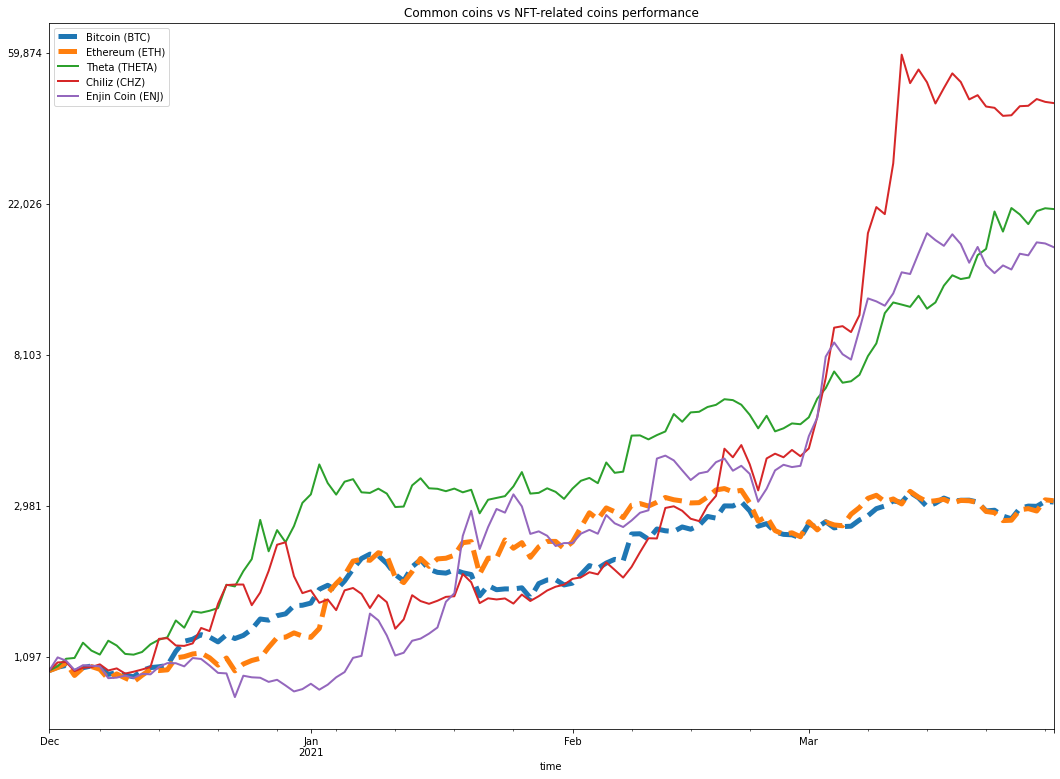

In [8]:
fig, ax = plt.subplots(1,1, figsize=(18,13))
ax.set_title('Common coins vs NFT-related coins performance')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: x.strftime('%Y-%m-%d')))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{np.exp(x):,.0f}'))
np.log(df_common_norm).plot(ax=ax, lw=5, ls='--')
np.log(df_nft_norm).plot(ax=ax, lw=2)